<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_01_pandas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
!pip uninstall numpy -y

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4


In [2]:
!pip install numpy==1.24.4

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.


In [3]:
pip install fitter

In [1]:
#Tipo de dato de tiempo en Pandas
#En este ejemplo vamos a crear una serie de tiempo de un mes cada dia cada hora
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

'''
# range_date
rd = pd.date_range(start ='1/1/2025', end ='1/4/2025', freq ='h')
print(rd)
print(type(rd[2]))
print(len(rd))
'''

"\n# range_date\nrd = pd.date_range(start ='1/1/2025', end ='1/4/2025', freq ='h')\nprint(rd)\nprint(type(rd[2]))\nprint(len(rd))\n"

In [2]:
'''
#Creamos un dataframe con una columna aleatoria y el tiempo como indice
df = pd.DataFrame(rd, columns=['datetime'])
df['data'] = np.random.randint(0, 100, size=(len(rd)))
df.set_index('datetime', inplace=True)
df.head()
df.tail()
'''

"\n#Creamos un dataframe con una columna aleatoria y el tiempo como indice\ndf = pd.DataFrame(rd, columns=['datetime'])\ndf['data'] = np.random.randint(0, 100, size=(len(rd)))\ndf.set_index('datetime', inplace=True)\ndf.head()\ndf.tail()\n"

In [3]:
'''
#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos
filtered_df = df.loc['2025-01-02']
print(filtered_df)
'''

"\n#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos\nfiltered_df = df.loc['2025-01-02']\nprint(filtered_df)\n"



# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



_______________________________________________________

Leer el dataset desde el github.

In [18]:
df_st = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')
df_st.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


_________________________________________

Definir como indice la columna time.

In [19]:
new_df_st = df_st.set_index('time')
new_df_st.head()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


______________________________________________

Determine si hay null, nan en el data frame.

In [20]:
new_df_st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


Aca se observa que no se tienen celdas vacias

Obtenga información del data frame.

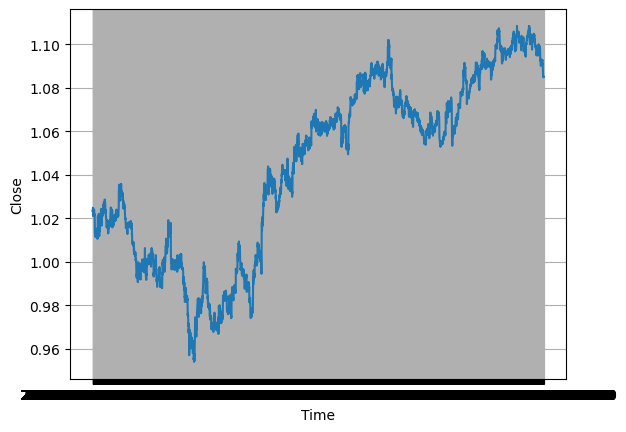

In [21]:
plt.figure()
plt.plot(new_df_st.index, new_df_st.close)
plt.xlabel('Time')
plt.ylabel('Close')
plt.grid()
plt.show()

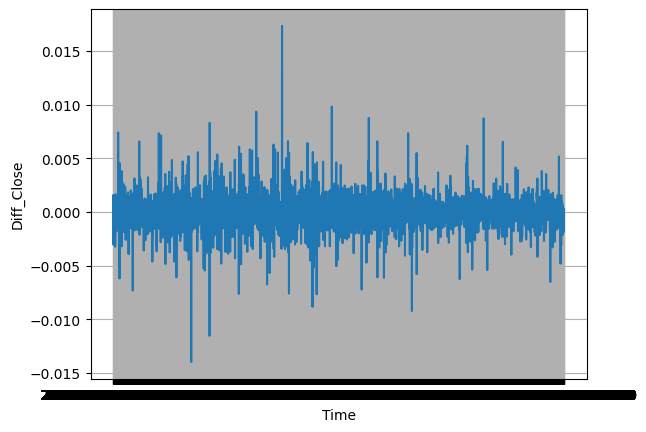

In [22]:
plt.figure()
plt.plot(new_df_st.index, new_df_st.Diff_Close)
plt.xlabel('Time')
plt.ylabel('Diff_Close')
plt.grid()
plt.show()

______________________________________________

Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

In [23]:
df_st_close = df_st[['time','close']].copy()
df_st_close.set_index('time', inplace=True)
df_st_close.rename(columns={'close': 'Close'}, inplace=True)
df_st_close.head()

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181


__________________________________________

Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:

Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

Para la nueva columna construya un histograma de los datos.

Determine la mejor distribucion estadística que se ajusta al histograma anterior

ya se cuenta con la columna DiffPrice en el dataframe original aparece como Diff_Price

In [24]:
df_st_close

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [25]:
df_st_diff = new_df_st[['close','Diff_Close']].copy()
df_st_diff.head()

,close,Diff_Close
time,,
2022-07-25 13:00:00,1.02345,-0.00046
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304


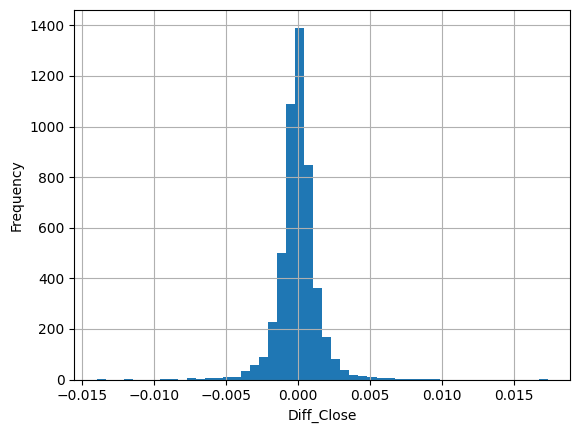

In [26]:
#Ahora se hae el histograma de diff_close
plt.figure()
plt.hist(df_st_diff['Diff_Close'], bins=50)
plt.xlabel('Diff_Close')
plt.ylabel('Frequency')
plt.grid()
plt.show()

(14614.642403887316,
 27365.836783439798,
 -0.20963189539643057,
 0.602201527664949)

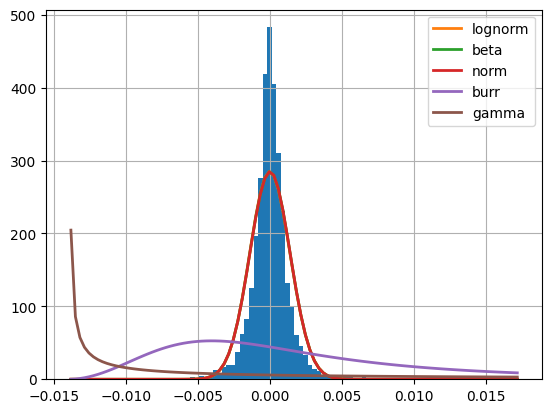

In [27]:
#Luego se determina la mejor distribucion que se ajusta al histograma anterior usando fit
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df_st_diff['Diff_Close'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

In [29]:
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dpareto_lognorm',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'irwinhall',
 'jf_skew_t',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'landau',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'multivariate_normal',
 'nakagami',
 '

{'dgamma': {'a': 0.9792785915221327,
  'loc': 1.0000000000000003e-05,
  'scale': 0.0009387338496968062}}

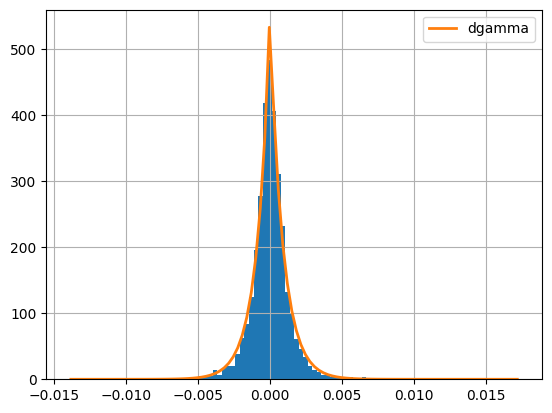

In [30]:
f = Fitter(df_st_diff['Diff_Close'],
           distributions=['dgamma'])
f.fit()
f.summary()

# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
#f.fitted_param["beta"]

________________________________________

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor. Puede consultar esta página si desea ver un ejemplo.

Para el data frame, seleccionemos solo los datos del 2023.


In [31]:
df_st.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [42]:
df_st['date'] = pd.to_datetime(df_st['time'], dayfirst=True)

df_filtrado_2023 = df_st[df_st['date'].dt.year == 2023]

df_filtrado_2023.head()

<ipython-input-42-8d6a2537401e>:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_st['date'] = pd.to_datetime(df_st['time'], dayfirst=True)


,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,date
2722,2722,2023-01-02 0:00:00,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315,2023-01-02 00:00:00
2723,2723,2023-01-02 1:00:00,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090,2023-01-02 01:00:00
2724,2724,2023-01-02 2:00:00,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055,2023-01-02 02:00:00
2725,2725,2023-01-02 3:00:00,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345,2023-01-02 03:00:00
2726,2726,2023-01-02 4:00:00,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895,2023-01-02 04:00:00


In [43]:
df_filtrado_2023.set_index('time', inplace=True)


In [44]:
df_filtrado_2023.head()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen,date
time,,,,,,,,,,,,,
2023-01-02 0:00:00,2722,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315,2023-01-02 00:00:00
2023-01-02 1:00:00,2723,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090,2023-01-02 01:00:00
2023-01-02 2:00:00,2724,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055,2023-01-02 02:00:00
2023-01-02 3:00:00,2725,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345,2023-01-02 03:00:00
2023-01-02 4:00:00,2726,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895,2023-01-02 04:00:00


El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

In [46]:
df_filtrado_2023.groupby(pd.Grouper(key='date', freq='15D')).mean()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
date,,,,,,,,,,,,
2023-01-02,2853.5,1.069313,1.070248,1.068430,1.069361,3503.856061,10.181818,0.0,1.069337,0.000047,0.000043,0.000045
2023-01-17,3117.5,1.085552,1.086401,1.084746,1.085565,3191.670455,8.973485,0.0,1.085558,0.000015,0.000020,0.000017
2023-02-01,3381.5,1.077734,1.078544,1.076861,1.077679,3179.253788,8.863636,0.0,1.077707,-0.000066,-0.000069,-0.000068
2023-02-16,3645.5,1.063187,1.063884,1.062480,1.063150,2926.143939,8.833333,0.0,1.063169,-0.000034,-0.000034,-0.000034
2023-03-03,3909.0,1.063175,1.064041,1.062303,1.063186,3618.418251,8.904943,0.0,1.063181,0.000026,0.000023,0.000024
2023-03-18,4160.0,1.080871,1.081651,1.080142,1.080936,2913.150628,8.861925,0.0,1.080903,0.000074,0.000077,0.000076
2023-04-02,4399.5,1.093027,1.093724,1.092419,1.093090,2085.712500,9.041667,0.0,1.093059,0.000063,0.000063,0.000063
2023-04-17,4651.5,1.099085,1.099761,1.098398,1.099084,2277.863636,8.715909,0.0,1.099085,-0.000006,-0.000009,-0.000008
2023-05-02,4891.5,1.098948,1.099641,1.098257,1.098889,2295.592593,8.648148,0.0,1.098918,-0.000059,-0.000056,-0.000057


Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

In [48]:
q = df_filtrado_2023.groupby(pd.Grouper(key='date', freq='M'))

<ipython-input-48-91becffa56df>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  q = df_filtrado_2023.groupby(pd.Grouper(key='date', freq='M'))


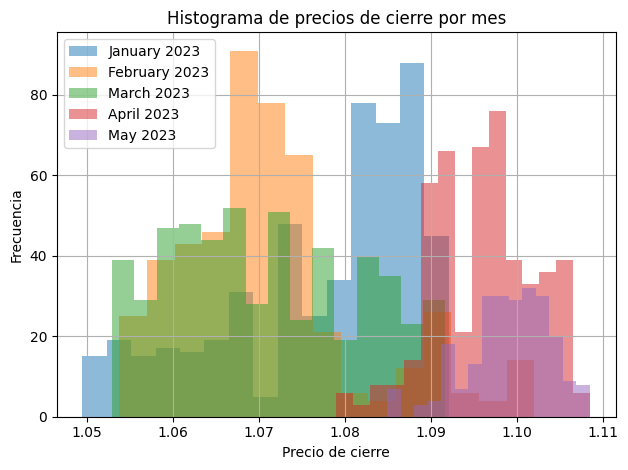

In [53]:
for name, group in q:
  plt.hist(group['close'], bins=15,alpha=0.5,label=f'{name.strftime("%B %Y")}')

plt.title(f'Histograma de precios de cierre por mes')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

____________________________________________


________________________________________________

Para el siguiente dataset realizar lo siguiente:

Leer los datos desde una página web.

In [123]:
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')

In [124]:
df2

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Este dataframe no tiene encabezado pero la página dice cual es, entonces:

In [125]:
columnas = [
    "Id", "Diagnosis",
    "RadiusMean", "TextureMean", "PerimeterMean", "AreaMean", "SmoothnessMean",
    "CompactnessMean", "ConcavityMean", "ConcavePointsMean", "SymmetryMean", "FractalDimensionMean",
    "RadiusSe", "TextureSe", "PerimeterSe", "AreaSe", "SmoothnessSe",
    "CompactnessSe", "ConcavitySe", "ConcavePointsSe", "SymmetrySe", "FractalDimensionSe",
    "RadiusWorst", "TextureWorst", "PerimeterWorst", "AreaWorst", "SmoothnessWorst",
    "CompactnessWorst", "ConcavityWorst", "ConcavePointsWorst", "SymmetryWorst", "FractalDimensionWorst"
]


df2.columns = columnas

In [126]:
df2.head()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Renombrar las columnas en formato PascalCase.


Como las columnas tuve que ponerlas de manera manual de una vez usé el formato PascalCase

Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame.

In [127]:
df2.head()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [128]:
df2.tail()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [129]:
df2.describe()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     568 non-null    int64  
 1   Diagnosis              568 non-null    object 
 2   RadiusMean             568 non-null    float64
 3   TextureMean            568 non-null    float64
 4   PerimeterMean          568 non-null    float64
 5   AreaMean               568 non-null    float64
 6   SmoothnessMean         568 non-null    float64
 7   CompactnessMean        568 non-null    float64
 8   ConcavityMean          568 non-null    float64
 9   ConcavePointsMean      568 non-null    float64
 10  SymmetryMean           568 non-null    float64
 11  FractalDimensionMean   568 non-null    float64
 12  RadiusSe               568 non-null    float64
 13  TextureSe              568 non-null    float64
 14  PerimeterSe            568 non-null    float64
 15  AreaSe

Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

Usando .info() observo que no hay valores null osea que no tenemos celdas vacias, lo que no sé es si cuento con valores NAN lo cual se averigua de la siguiente manera

In [131]:
df2.isna().sum()

,0
Id,0
Diagnosis,0
RadiusMean,0
TextureMean,0
PerimeterMean,0
AreaMean,0
SmoothnessMean,0
CompactnessMean,0
ConcavityMean,0
ConcavePointsMean,0


No se observa ningúna celda con NAN

Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores.

In [132]:
valores_unicos = df2['Diagnosis'].unique()
print("Valores únicos en la columna Diagnosis:", valores_unicos)

Valores únicos en la columna Diagnosis: ['M' 'B']


Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot():

import seaborn as sns
sns.countplot?

In [133]:
import seaborn as sns

<ipython-input-134-0664c9ef1cdb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df2, palette='Set2')


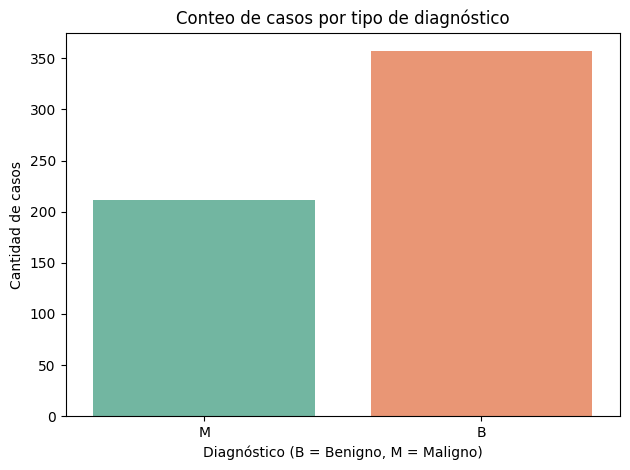

In [134]:
sns.countplot(x='Diagnosis', data=df2, palette='Set2')
plt.title('Conteo de casos por tipo de diagnóstico')
plt.xlabel('Diagnóstico (B = Benigno, M = Maligno)')
plt.ylabel('Cantidad de casos')
plt.tight_layout()
plt.show()

Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [135]:
df2['DiagnosisNumeric'] = df2['Diagnosis'].map({'B': 0, 'M': 1})

In [136]:
df2

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:
(x - mean(x)) / std(x)

In [137]:

cols_norm = df2.columns.difference(['Id', 'Diagnosis', 'DiagnosisNumeric'])

df2_norm = df2.copy()
df2_norm[cols_norm] = (df2[cols_norm] - df2[cols_norm].mean()) / df2[cols_norm].std()


In [138]:
df2_norm

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,842517,M,1.830470,-0.358011,1.687618,1.908710,-0.824539,-0.485070,-0.019261,0.554772,...,-0.371548,1.543702,1.897382,-0.373215,-0.427674,-0.143346,1.094298,-0.240232,0.285043,1
1,84300903,M,1.580713,0.453460,1.568207,1.559202,0.945359,1.067019,1.374283,2.049703,...,-0.026364,1.355500,1.462405,0.529576,1.092229,0.860555,1.964736,1.162833,0.205120,1
2,84348301,M,-0.766441,0.250592,-0.590251,-0.762039,3.287662,3.435455,1.929178,1.461881,...,0.131574,-0.246606,-0.547470,3.395718,3.914815,1.997637,2.186163,6.080876,4.946097,1
3,84358402,M,1.751002,-1.157824,1.778206,1.826305,0.283249,0.549402,1.381850,1.438575,...,-1.468970,1.346538,1.226425,0.222802,-0.310119,0.618234,0.735433,-0.867790,-0.394301,1
4,843786,M,-0.474111,-0.840697,-0.384782,-0.503461,2.241101,1.259932,0.874877,0.832368,...,-0.316188,-0.111280,-0.241225,2.050296,1.733668,1.269712,0.912575,1.767630,2.248702,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,2.111448,0.719287,2.062322,2.343463,1.045032,0.226607,1.960706,2.334550,...,0.115291,1.761777,2.022416,0.380571,-0.269870,0.669679,1.637940,-1.362033,-0.706777,1
564,926682,M,1.705592,2.085730,1.617619,1.724011,0.105263,-0.012147,0.700842,1.273105,...,2.044737,1.430184,1.501148,-0.688754,-0.391896,0.240810,0.740014,-0.529624,-0.972077,1
565,926954,M,0.703723,2.046089,0.674683,0.579160,-0.838066,-0.033157,0.051488,0.110669,...,1.372280,0.584769,0.432196,-0.807081,0.356875,0.331199,0.419326,-1.105157,-0.315489,1
566,927241,M,1.838985,2.337566,1.984087,1.735377,1.529155,3.303663,3.316417,2.673777,...,2.235239,2.314434,1.659641,1.432367,3.926315,3.208280,2.300695,1.933462,2.226501,1


Agrupar características similares y calcular su promedio. Para las siguientes características:

['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
Usa expresiones regulares para identificar patrones comunes, como radius1, radius2,radius3, etc., y calcular los promedios. Por ejemplo:

re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
También puedes utilizar el método startswith() para buscar estos patrones en los nombres de las columnas.

In [167]:
import re

mean_features = [
    'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean',
    'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean'
]

prefixes = set()
for col in mean_features:
    match = re.match(r'^[a-zA-Z]+', col)
    if match:
        prefixes.add(match.group(0))

print("Prefijos detectados:", prefixes)

Prefijos detectados: {'TextureMean', 'AreaMean', 'PerimeterMean', 'CompactnessMean', 'SmoothnessMean', 'RadiusMean', 'FractalDimensionMean', 'ConcavePointsMean', 'ConcavityMean', 'SymmetryMean'}


In [168]:
for prefix in prefixes:
    group_cols = [col for col in mean_features if col.startswith(prefix)]

    df2[f'{prefix}Avg'] = df2[group_cols].mean(axis=1)

In [169]:
df2[[f'{p}Avg' for p in prefixes]].head()

,TextureMeanAvg,AreaMeanAvg,PerimeterMeanAvg,CompactnessMeanAvg,SmoothnessMeanAvg,RadiusMeanAvg,FractalDimensionMeanAvg,ConcavePointsMeanAvg,ConcavityMeanAvg,SymmetryMeanAvg
0,17.77,1326.0,132.90,0.07864,0.08474,20.57,0.05667,0.07017,0.0869,0.1812
1,21.25,1203.0,130.00,0.15990,0.10960,19.69,0.05999,0.12790,0.1974,0.2069
2,20.38,386.1,77.58,0.28390,0.14250,11.42,0.09744,0.10520,0.2414,0.2597
3,14.34,1297.0,135.10,0.13280,0.10030,20.29,0.05883,0.10430,0.1980,0.1809
4,15.70,477.1,82.57,0.17000,0.12780,12.45,0.07613,0.08089,0.1578,0.2087


Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

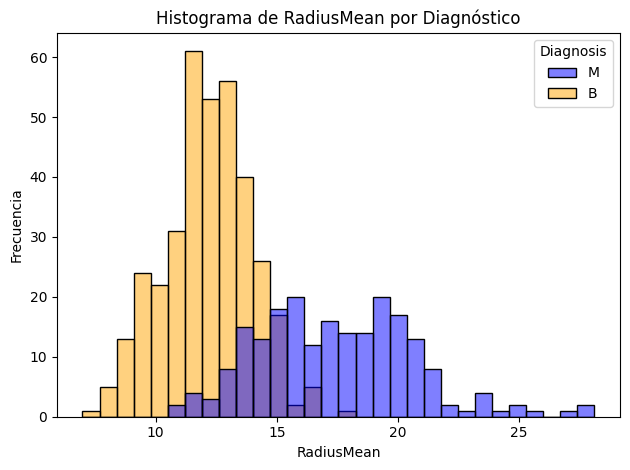

In [170]:
plt.figure()
sns.histplot(data=df2, x='RadiusMean', hue='Diagnosis', bins=30, palette={'B': 'orange', 'M': 'blue'}, edgecolor='black')
plt.title('Histograma de RadiusMean por Diagnóstico')
plt.xlabel('RadiusMean')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Generar gráficos de violín para múltiples características. Para las columnas:

RadiusMean

TextureMean

PerimeterMean

AreaMean

SmoothnessMean

CompactnessMean

ConcavityMean

ConcavePointsMean

Symmetry3

FractalDimension3

Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")

sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")

plt.xticks(rotation=45)

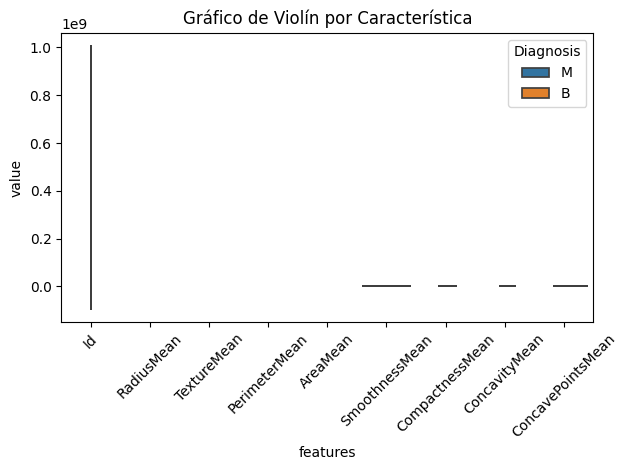

In [151]:
features = [
    "RadiusMean", "TextureMean", "PerimeterMean", "AreaMean", "SmoothnessMean",
    "CompactnessMean", "ConcavityMean", "ConcavePointsMean",
    "SymmetryWorst", "FractalDimensionWorst"
]

data = pd.melt(df2.iloc[:, 0:10],
               id_vars="Diagnosis",
               var_name="features",
               value_name="value")

plt.figure()
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,
               split=True, inner="quart")

plt.title("Gráfico de Violín por Característica")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Determinar y eliminar los valores atípicos (outliers) en la columna RadiusMean.
Para identificarlos, construye un gráfico tipo boxplot:

df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers.

Ejemplo de cómo eliminar estos valores:

Q1 = df['edad'].quantile(0.25)

Q3 = df['edad'].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]

Otra alternativa es utilizar el puntaje Z para detectar outliers:

df = df[(np.abs(stats.zscore(df['edad'])) < 3)]

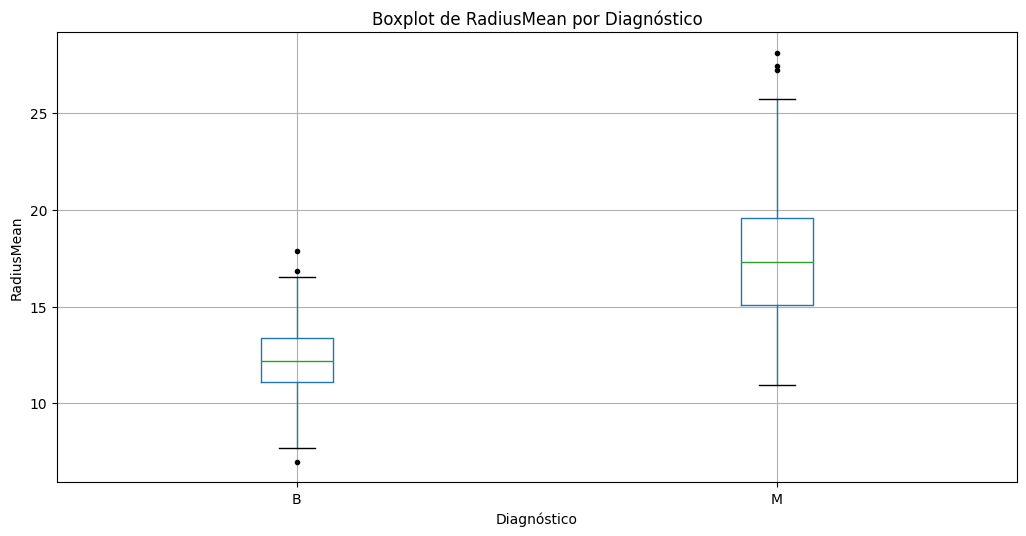

In [153]:
df2.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(12,6))
plt.title("Boxplot de RadiusMean por Diagnóstico")
plt.suptitle("")
plt.xlabel("Diagnóstico")
plt.ylabel("RadiusMean")
plt.show()

In [155]:
Q1 = df2['RadiusMean'].quantile(0.25)
Q3 = df2['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df2[(df2['RadiusMean'] >= lower_bound) & (df2['RadiusMean'] <= upper_bound)]

In [156]:
df_iqr

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureMeanAvg,AreaMeanAvg,PerimeterMeanAvg,CompactnessMeanAvg,SmoothnessMeanAvg,RadiusMeanAvg,FractalDimensionMeanAvg,ConcavePointsMeanAvg,ConcavityMeanAvg,SymmetryMeanAvg
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,17.77,1326.0,132.90,0.07864,0.08474,20.57,0.05667,0.07017,0.08690,0.1812
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,21.25,1203.0,130.00,0.15990,0.10960,19.69,0.05999,0.12790,0.19740,0.2069
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,20.38,386.1,77.58,0.28390,0.14250,11.42,0.09744,0.10520,0.24140,0.2597
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,14.34,1297.0,135.10,0.13280,0.10030,20.29,0.05883,0.10430,0.19800,0.1809
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.70,477.1,82.57,0.17000,0.12780,12.45,0.07613,0.08089,0.15780,0.2087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,22.39,1479.0,142.00,0.11590,0.11100,21.56,0.05623,0.13890,0.24390,0.1726
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,28.25,1261.0,131.20,0.10340,0.09780,20.13,0.05533,0.09791,0.14400,0.1752
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,28.08,858.1,108.30,0.10230,0.08455,16.60,0.05648,0.05302,0.09251,0.1590
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,29.33,1265.0,140.10,0.27700,0.11780,20.60,0.07016,0.15200,0.35140,0.2397


Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.



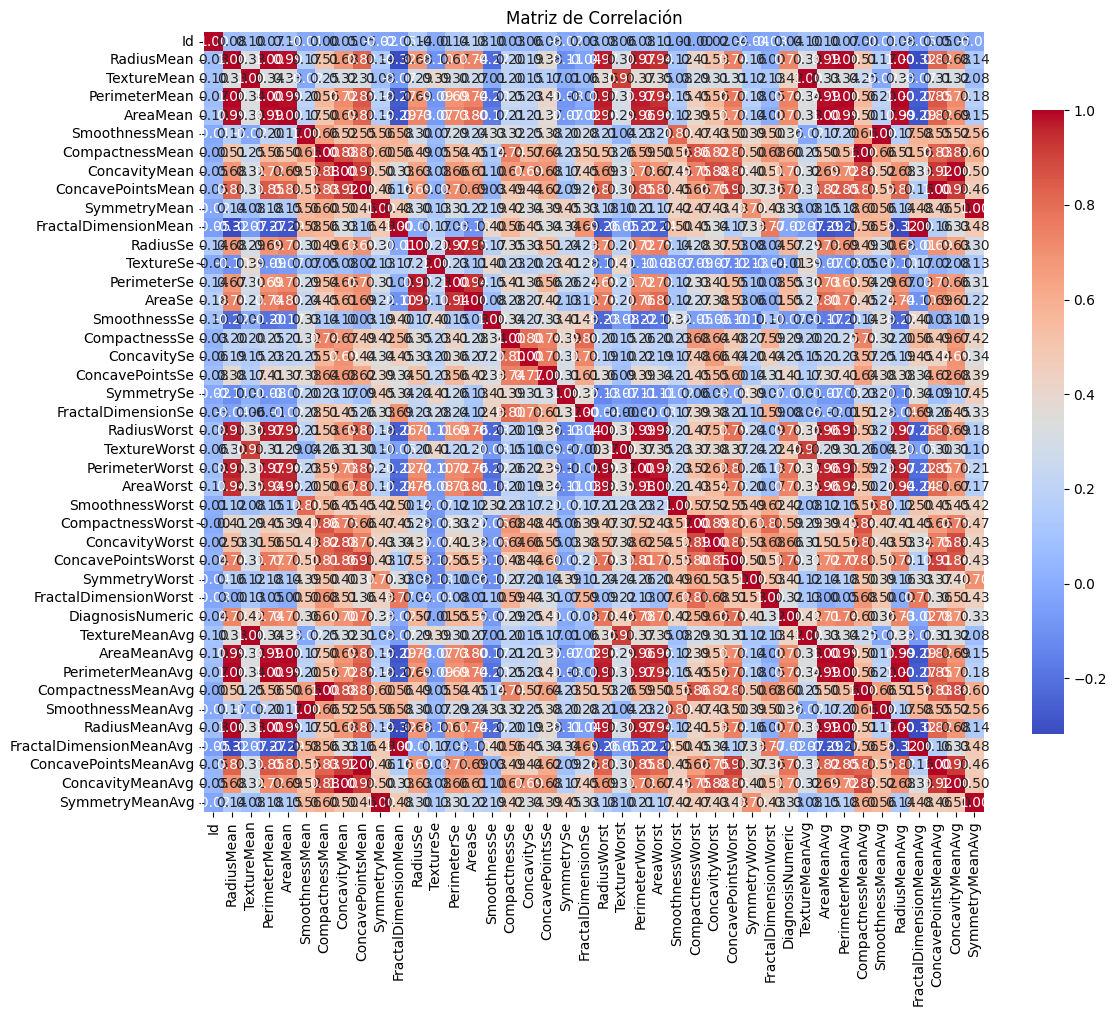

In [163]:
correlation_matrix = df2.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            cbar_kws={'shrink': 0.8})

plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?





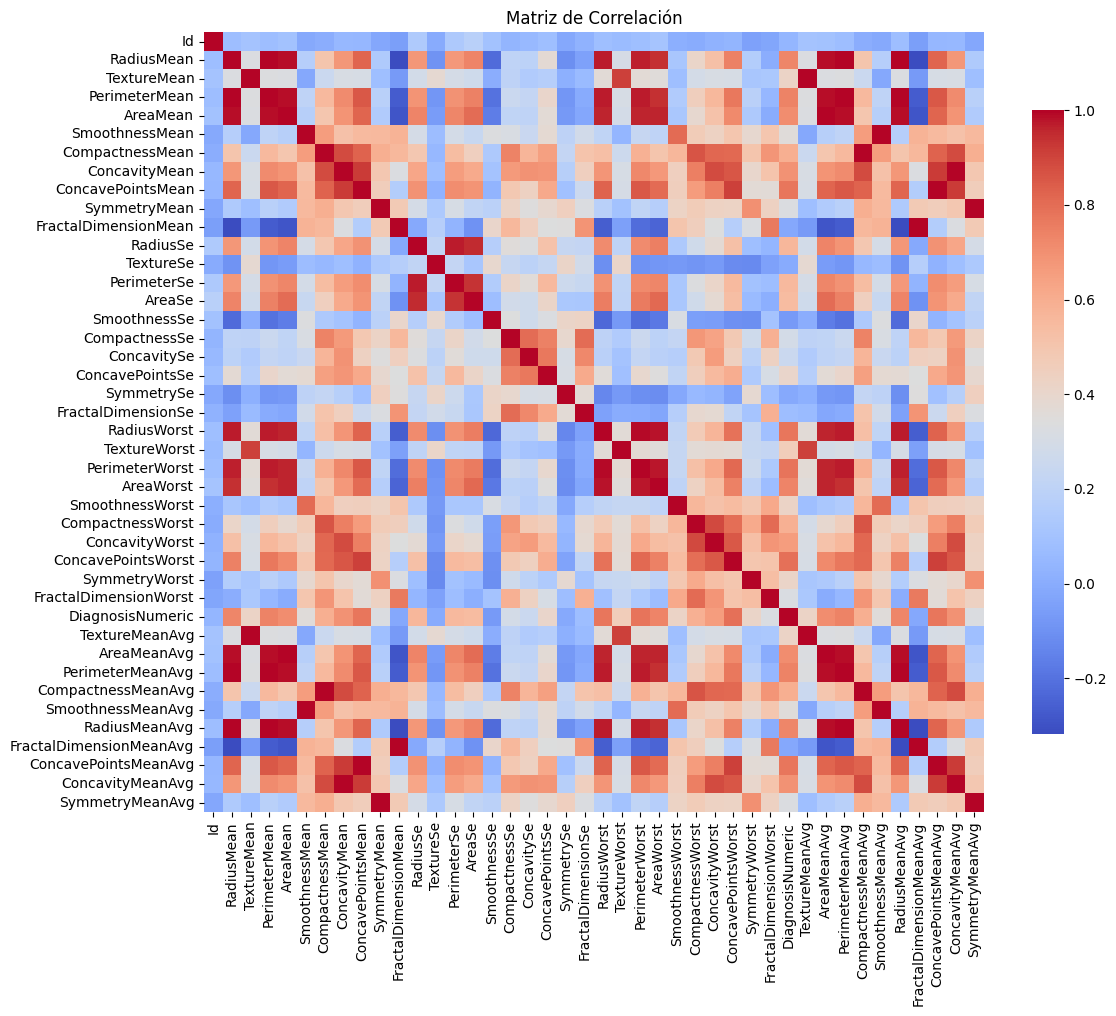

In [164]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap="coolwarm",
            square=True,
            cbar_kws={'shrink': 0.8})

plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

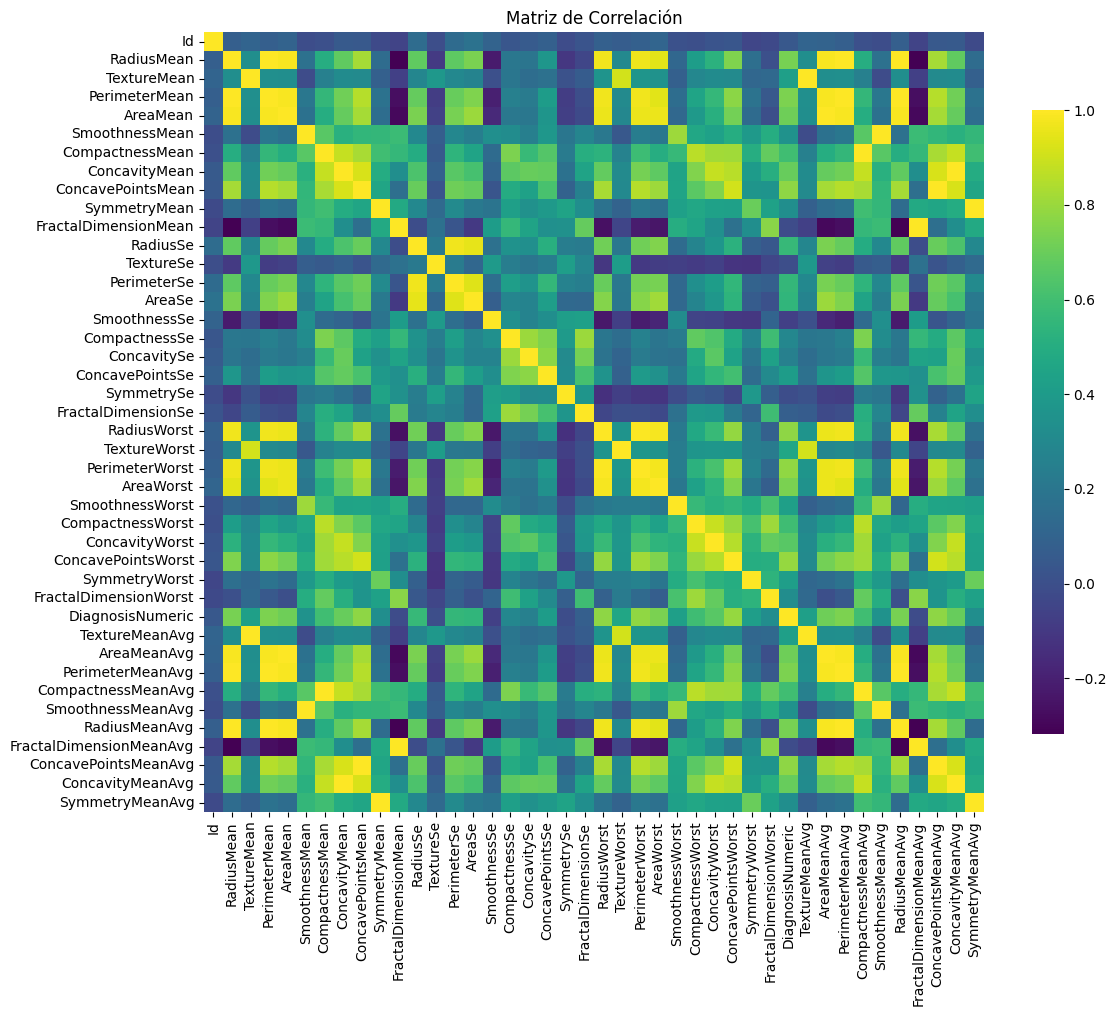

In [165]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap="viridis",
            square=True,
            cbar_kws={'shrink': 0.8})

plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

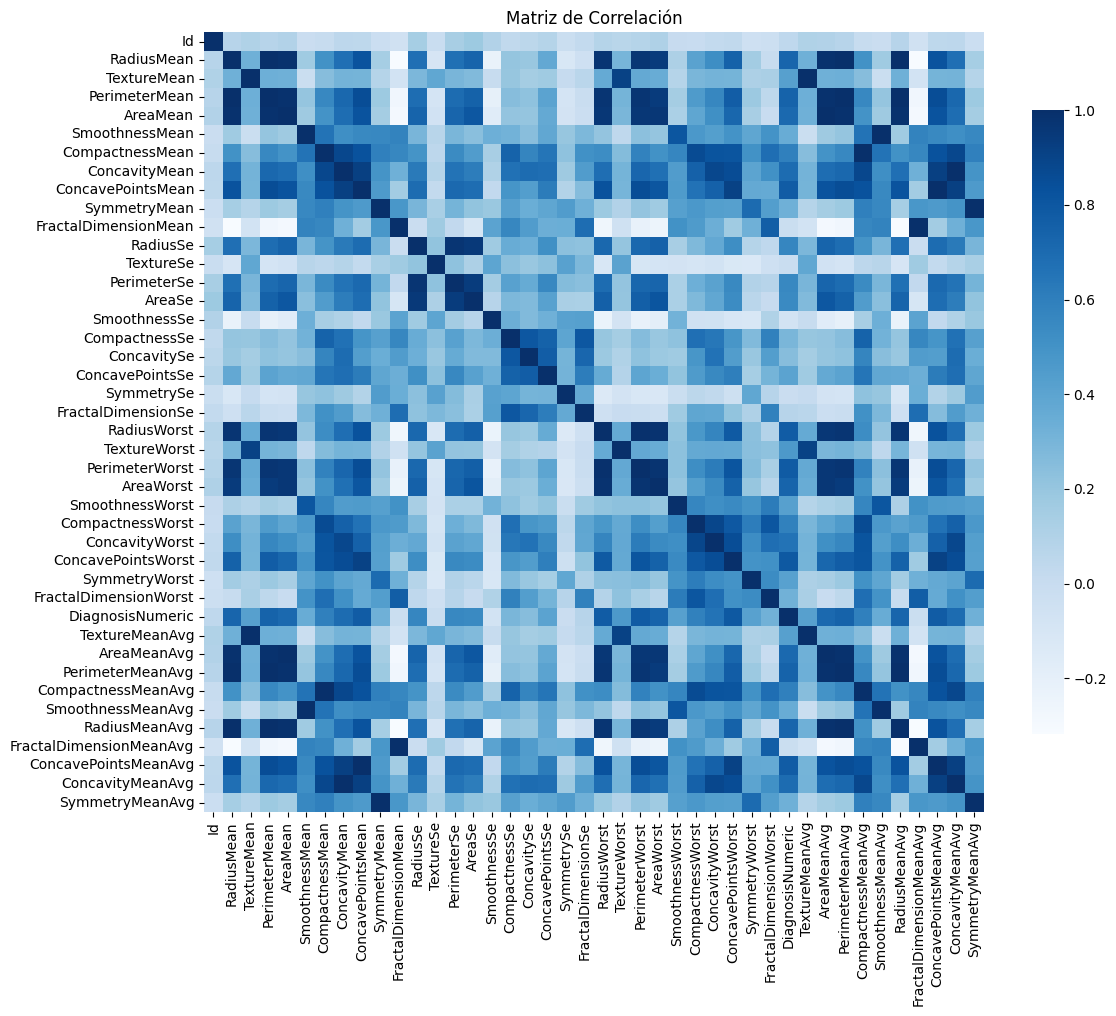

In [166]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap="Blues",
            square=True,
            cbar_kws={'shrink': 0.8})

plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

La matriz de correlación considero que no se ve tan claro por la gran cantidad de datos